<a href="https://colab.research.google.com/github/ishandahal/stats453-deep_learning_torch/blob/main/perceptron_adaline_linear_regression/hw2_tanh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STAT 453: Deep Learning (Spring 2020)  
Instructor: Sebastian Raschka (sraschka@wisc.edu)  

Course website: http://pages.stat.wisc.edu/~sraschka/teaching/stat453-ss2020/  
GitHub repository: https://github.com/rasbt/stat453-deep-learning-ss20

In [ ]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -v -p matplotlib,torch,pandas

# HW 2: A Single Layer Neuron with a Non-Linear Activation Function (50 pts)

# Problem Setting

Suppose you have a neuron model similar to ADALINE (discussed in class) but the activation function (which is an identity function in ADALINE) is replaced by a non-linear activation function. The figure below shows an arbitrary single-layer neuron.

- If $\sigma(z) = z$, the activation function is an identity function and the neuron represents ADALINE.
- If $\sigma(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$, the activation function is a hyperbolic tangent (tanh), which is a non-linear sigmoid function (https://en.wikipedia.org/wiki/Sigmoid_function).


![](https://github.com/rasbt/stat453-deep-learning-ss20/blob/master/hw02/images/neuron.png?raw=1)

As mentioned above, in this homework, we are working with a tanh activation function, which we defined as
$$
\sigma(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}},
$$

![](https://github.com/rasbt/stat453-deep-learning-ss20/blob/master/hw02/images/tanh.png?raw=1)

Here $z$ denotes the net input,  $z = \mathbf{w}^\top \mathbf{x} + b$ (for a single training example, we write $z^{[i]} = \mathbf{w}^\top \mathbf{x}^{[i]} + b$).

Assume now that we want learn the parameters of the neuron model for a binary classification task with class labels $y \in \{0, 1\}$ similar to ADALINE. We use the same loss function, mean squared error (MSE), as in ADALINE, during training:



$$
\mathcal{L}(\mathbf{\hat{y}}, \mathbf{y}) = \frac{1}{n} \sum_{i}^{} (\hat{y}^{[i]} - y^{[i]})^2.
$$

## TASK 1: Compute the Loss Gradients with respect to the weights and bias unit  -- 25 pts

Your task is to derive the gradient of the loss $\mathcal{L}$ with respect to the weight vector and the bias unit and formulate the learning rule. 

Remember that the gradient of the loss is defined as 

$$
\nabla_\mathbf{w} \mathcal{L}(\mathbf{w}) = 
\begin{bmatrix}
\frac{\partial \mathcal{L}(\mathbf{w})}{\partial w_1}\\
\vdots \\
\frac{\partial \mathcal{L}(\mathbf{w})}{\partial w_m}\\
\end{bmatrix}
$$

**For simplicity, it is sufficient if you write down the partial derivative and learning rule for a single weight $w_j$ and the bias unit $b$**. 

To provide you with a hint, recall that we computed the partial Loss derivatives for ADALINE as follows:

$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial w_j} &= \frac{\partial}{\partial w_j} \frac{1}{n} \sum_i (\hat{y}^{[i]} - y^{[i]} )^2\\
&= \frac{\partial}{\partial w_j}  \frac{1}{n} \sum_i (\sigma(\mathbf{w}^T\mathbf{x}^{[i]} + b) - y^{[i]})^2\\
\\
&= \quad ... \\
\\
&= \sum_i \frac{2}{n}  (\sigma(\mathbf{w}^T\mathbf{x}^{[i]} + b) - y^{[i]})   x_j^{[i]}
\end{align}
$$

<br>
<br>

$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial b} &= \frac{\partial}{\partial b} \frac{1}{n}\sum_i (\hat{y}^{[i]} - y^{[i]} )^2\\
&= \frac{\partial}{\partial b}  \frac{1}{n} \sum_i (\sigma(\mathbf{w}^T\mathbf{x}^{[i]} + b) - y^{[i]})^2\\
\\
&= \quad ... \\
\\
&= \sum_i \frac{2}{n}  (\sigma(\mathbf{w}^T\mathbf{x}^{[i]} + b) - y^{[i]})
\end{align}
$$

Again, your task is to derive 

- a) $$\frac{\partial \mathcal{L}}{\partial w_j}$$ 

and 

- b) $$\frac{\partial \mathcal{L}}{\partial b}$$ 

for the neuron model with the non-linear activation function 

$$
\sigma(\mathbf{w}^\top \mathbf{x} + b) =  \frac{e^{\mathbf{w}^\top \mathbf{x} + b} - e^{- (\mathbf{w}^\top \mathbf{x} + b)}}{e^{\mathbf{w}^\top \mathbf{x}+b} + e^{- (\mathbf{w}^\top \mathbf{x}+ b)}}
$$

For partial credits in case of a wrong solution, also write down the individual steps in the cell below.

**!!!Fill in with your solution below!!!**

$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial w_j} &= \frac{\partial}{\partial w_j} \frac{1}{n}\sum_i (\hat{y}^{[i]} - y^{[i]} )^2\\
&= ...\\
&= ...\\
&= ...\\
\end{align}
$$

<br>
<br>

**!!!Fill in with your solution below!!!**
$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial b} &= \frac{\partial}{\partial b} \frac{1}{n} \sum_i (\hat{y}^{[i]} - y^{[i]} )^2\\
&= ...\\
&= ...\\
&= ...\\
\end{align}
$$

# Coding Section

Complete the code below, the missing parts are indicated via 

    # <YOUR CODE HERE>
    
to implement the neuron model (it is very similar to the ADALINE model we discussed in class, except the derivatives).

## Imports (Don't modify this section, just execute)

**No modification required.** You should execute this code and are encouraged to explore it further, but it is recommended to  not make any alterations here.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
%matplotlib inline

## Loading the dataset (Don't modify this section, just execute)

**No modification required.** You should execute this code and are encouraged to explore it further, but it is recommended to  not make any alterations here.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/stat453-deep-learning-ss20/master/hw02/datasets/iris.data', index_col=None, header=None)
df.columns = ['x1', 'x2', 'x3', 'x4', 'y']
df = df.iloc[50:150]
df['y'] = df['y'].apply(lambda x: 0 if x == 'Iris-versicolor' else 1)
df.tail()

,x1,x2,x3,x4,y
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1
149,5.9,3.0,5.1,1.8,1


In [ ]:
# Assign features and target

X = torch.tensor(df[['x2', 'x3']].values, dtype=torch.float)
y = torch.tensor(df['y'].values, dtype=torch.int)

# Shuffling & train/test split

torch.manual_seed(123)
shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)

X, y = X[shuffle_idx], y[shuffle_idx]

percent70 = int(shuffle_idx.size(0)*0.7)

X_train, X_test = X[shuffle_idx[:percent70]], X[shuffle_idx[percent70:]]
y_train, y_test = y[shuffle_idx[:percent70]], y[shuffle_idx[percent70:]]

# Normalize (mean zero, unit variance)

mu, sigma = X_train.mean(dim=0), X_train.std(dim=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

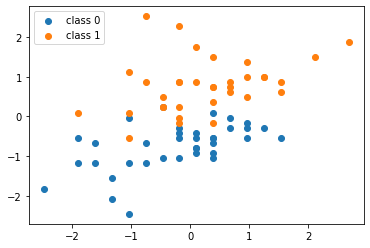

In [ ]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='class 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='class 1')
plt.legend()
plt.show()

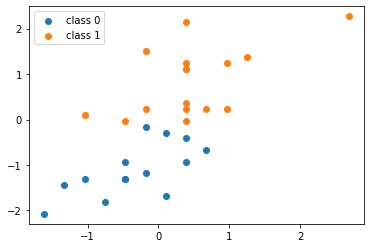

In [ ]:
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], label='class 0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], label='class 1')
plt.legend()
plt.show()

## TASK 2: Implement the Neuron Model (Modifications required) -- 25 pts

Your task is to complete the `backward` method to compute the gradients based on the gradients you computed in TASK1.

In [ ]:
from torch.autograd import grad

In [ ]:
class NeuronModel():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1, 
                                   dtype=torch.float)
        self.bias = torch.zeros(1, dtype=torch.float)
        
    def activation_func(self, x):
        return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))
    
    def netinput_func(self, x, w, b):
         return torch.add(torch.mm(x, w), b)

    def forward(self, x):
        netinputs = self.netinput_func(x, self.weights, self.bias)
        activations = self.activation_func(netinputs)
        return activations.view(-1)
        
    def backward(self, x, yhat, y):  
        
        # note that here, "yhat" are the "activations" 
        netinputs = self.netinput_func(x, self.weights, self.bias)
        
        ###############################################################################
        # YOU ONLY NEED TO EDIT IN THE BOX BELOW
        ###############################################################################
        grad_loss_yhat = 2 * (yhat - y)         # x[0] = (10,)          # partial derivaitve of the loss with respect to activation


        # grad_yhat_bias = (4 / (torch.exp(netinputs) + torch.exp(-netinputs))**2)            # dim of n            ## different method of coming to the derivative.
        # grad_yhat_weights = (4 / (torch.exp(netinputs) + torch.exp(-netinputs))**2) * x     # dim of x

        grad_yhat_weights = (1 - self.activation_func(netinputs)**2) * x        #dim of x (10X2)            partial derivative of activation with respect to weights 
        grad_yhat_bias = (1 - self.activation_func(netinputs)**2)               #dim of x[0] (10,)          partial derivative of activation with respect to bias
        
        grad_loss_weights = torch.mm(grad_yhat_weights.t(), 
                                     grad_loss_yhat.view(-1, 1)) / y.size(0)     #dim = (2X10).dot(10X1) = 2X1       Using the chain rule (inner and outer)
        grad_loss_bias = torch.sum(grad_loss_yhat * grad_yhat_bias) / y.size(0)  #dim = sum((10)*(10)) = 1          Using the chain rule (inner and outer)


        ################################################################################
        
        return (-1)*grad_loss_weights, (-1)*grad_loss_bias

# No modifications required beyond this point

You do not need to modify anything below. However, you should run and analyze the code to verify that your implementation of the Neuron model is likely correct.

## Training the Neuron Model (Don't modify this section, just execute)

In [ ]:
####################################################
##### Training and evaluation wrappers
###################################################

def loss(yhat, y):
    return torch.mean((yhat - y)**2)


def train(model, x, y, num_epochs,
          learning_rate=0.01, seed=123, minibatch_size=10):
    cost = []
    
    torch.manual_seed(seed)
    for e in range(num_epochs):
        
        #### Shuffle epoch
        shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)
        minibatches = torch.split(shuffle_idx, minibatch_size)
        
        for minibatch_idx in minibatches:

            #### Compute outputs ####
            yhat = model.forward(x[minibatch_idx])

            #### Compute gradients ####
            negative_grad_w, negative_grad_b = \
                model.backward(x[minibatch_idx], yhat, y[minibatch_idx])

            #### Update weights ####
            model.weights += learning_rate * negative_grad_w
            model.bias += learning_rate * negative_grad_b
            
            #### Logging ####
            #minibatch_loss = loss(yhat, y[minibatch_idx])
            #print('    Minibatch MSE: %.3f' % minibatch_loss)

        #### Logging ####
        yhat = model.forward(x)
        curr_loss = loss(yhat, y)
        print('Epoch: %03d' % (e+1), end="")
        print(' | MSE: %.5f' % curr_loss)
        cost.append(curr_loss)

    return cost

In [ ]:
model = NeuronModel(num_features=X_train.size(1))
cost = train(model, 
             X_train, y_train.float(),
             num_epochs=150,
             learning_rate=0.001,
             seed=123,
             minibatch_size=10)

Epoch: 001 | MSE: 0.42337
Epoch: 002 | MSE: 0.37589
Epoch: 003 | MSE: 0.33997
Epoch: 004 | MSE: 0.31275
Epoch: 005 | MSE: 0.29190
Epoch: 006 | MSE: 0.27550
Epoch: 007 | MSE: 0.26247
Epoch: 008 | MSE: 0.25219
Epoch: 009 | MSE: 0.24365
Epoch: 010 | MSE: 0.23669
Epoch: 011 | MSE: 0.23086
Epoch: 012 | MSE: 0.22595
Epoch: 013 | MSE: 0.22166
Epoch: 014 | MSE: 0.21792
Epoch: 015 | MSE: 0.21463
Epoch: 016 | MSE: 0.21165
Epoch: 017 | MSE: 0.20898
Epoch: 018 | MSE: 0.20656
Epoch: 019 | MSE: 0.20432
Epoch: 020 | MSE: 0.20222
Epoch: 021 | MSE: 0.20027
Epoch: 022 | MSE: 0.19843
Epoch: 023 | MSE: 0.19670
Epoch: 024 | MSE: 0.19503
Epoch: 025 | MSE: 0.19344
Epoch: 026 | MSE: 0.19191
Epoch: 027 | MSE: 0.19044
Epoch: 028 | MSE: 0.18902
Epoch: 029 | MSE: 0.18765
Epoch: 030 | MSE: 0.18632
Epoch: 031 | MSE: 0.18503
Epoch: 032 | MSE: 0.18376
Epoch: 033 | MSE: 0.18254
Epoch: 034 | MSE: 0.18134
Epoch: 035 | MSE: 0.18017
Epoch: 036 | MSE: 0.17904
Epoch: 037 | MSE: 0.17792
Epoch: 038 | MSE: 0.17684
Epoch: 039 |

## Evaluate the Trained Model  (Don't modify this section, just execute)

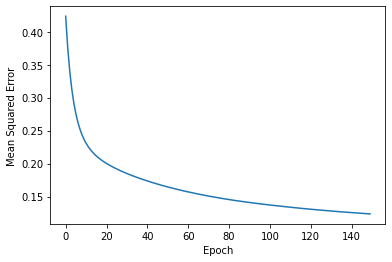

In [ ]:
plt.plot(range(len(cost)), cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

In [ ]:
print('Weights', model.weights)
print('Bias', model.bias)

Weights tensor([[0.0249],
        [0.3409]])
Bias tensor([0.5732])


In [ ]:
train_pred = model.forward(X_train)
train_acc = torch.mean(
    (torch.where(train_pred > 0.5, 
                 torch.tensor(1), 
                 torch.tensor(0)).int() == y_train).float())

test_pred = model.forward(X_test)
test_acc = torch.mean(
    (torch.where(train_pred > 0.5, 
                 torch.tensor(1), 
                 torch.tensor(0)).int() == y_train).float())

print('Training Accuracy: %.2f%%' % (train_acc*100))
print('Test Accuracy: %.2f%%' % (test_acc*100))

Training Accuracy: 91.43%
Test Accuracy: 91.43%


## Decision Boundary  (Don't modify this section, just execute)

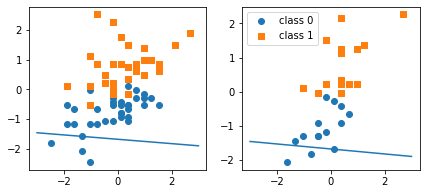

In [ ]:
##########################
### 2D Decision Boundary
##########################

w, b = model.weights, model.bias

x_min = -3
y_min = ( (-(w[0] * x_min) - b[0]) 
          / w[1] )

x_max = 3
y_max = ( (-(w[0] * x_max) - b[0]) 
          / w[1] )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()